# Chapter 9 - Mathematical Tools
수학용도구

## 1 Approximation (근사법 )
회귀법(regression), 보간법(interplation)을 활용하여 근사값을 계산

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# sin() 파동의 변화를 시각화
def f(x):
    return np.sin(x) + 0.5 * x

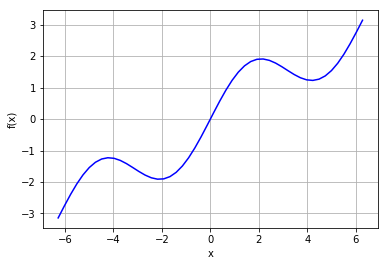

In [2]:
# 관심구간인 -2pi ~ 2pi 사이의 구간을 관찰
x = np.linspace(-2 * np.pi, 2 * np.pi, 50)

plt.plot(x, f(x), 'b')
plt.grid(True)
plt.xlabel('x'); plt.ylabel('f(x)')

### 01 회귀법
regression

#### 1) 1차 다항식을 적용
회귀식 모델의 다양한 적용 1

In [3]:
# np.polyfit()
# x factor , y target 의 회귀식 추출
x_sample = [i for i in range(10)]
y_sample = [i for i in range(0,20,2)]
reg = np.polyfit(x_sample, y_sample, deg=1)  # deg = 1 : 회귀식 x의 차수를 지정 (1차원 함수)
                             # deg = 2 : 회귀식은 X^2, X^1 두개의 차수로 구성 (X는 2차원 함수)
reg  # array(weight , bias) 출력

array([  2.00000000e+00,   1.12346671e-15])

In [4]:
# np.polyval() : 회귀식 검증
np.polyval(reg, x)            # 추출 회귀식에 x를 대입한, 예측 Y값 출력

array([-12.56637061, -12.05345753, -11.54054444, -11.02763136,
       -10.51471827, -10.00180518,  -9.4888921 ,  -8.97597901,
        -8.46306592,  -7.95015284,  -7.43723975,  -6.92432667,
        -6.41141358,  -5.89850049,  -5.38558741,  -4.87267432,
        -4.35976123,  -3.84684815,  -3.33393506,  -2.82102197,
        -2.30810889,  -1.7951958 ,  -1.28228272,  -0.76936963,
        -0.25645654,   0.25645654,   0.76936963,   1.28228272,
         1.7951958 ,   2.30810889,   2.82102197,   3.33393506,
         3.84684815,   4.35976123,   4.87267432,   5.38558741,
         5.89850049,   6.41141358,   6.92432667,   7.43723975,
         7.95015284,   8.46306592,   8.97597901,   9.4888921 ,
        10.00180518,  10.51471827,  11.02763136,  11.54054444,
        12.05345753,  12.56637061])

In [5]:
# 단항 기저함수 Monomials as Basis Functions
# np.polyfit() - train(훈련)
# np.polyval() - test (검증)
reg = np.polyfit(x, f(x), deg=1) # 
ry = np.polyval(reg, x)

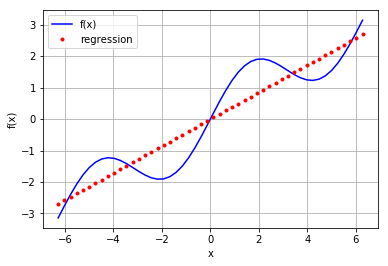

In [6]:
plt.plot(x, f(x), 'b', label='f(x)')        # sin() 그래프
plt.plot(x, ry,  'r.', label='regression')  # np.polyfit() 회귀식 그래프
plt.legend(loc=0)
plt.grid(True); plt.xlabel('x'); plt.ylabel('f(x)')

#### 2) 5차 다항식을 적용
회귀식 모델의 다양한 적용 2

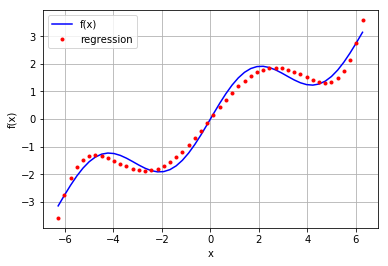

In [7]:
reg = np.polyfit(x, f(x), deg=5)
ry = np.polyval(reg, x)

plt.plot(x, f(x), 'b', label='f(x)')
plt.plot(x, ry, 'r.', label='regression')
plt.legend(loc=0); plt.grid(True); plt.xlabel('x'); plt.ylabel('f(x)')

#### 3) 7차 다항식을 적용
회귀식 모델의 다양한 적용 3

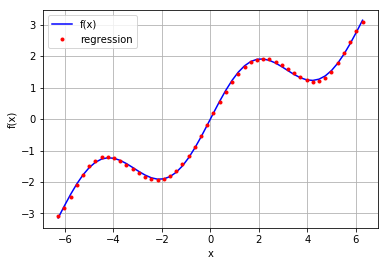

In [8]:
reg = np.polyfit(x, f(x), deg = 7)
ry = np.polyval(reg, x)

plt.plot(x, f(x), 'b', label='f(x)')
plt.plot(x, ry, 'r.', label='regression')
plt.legend(loc=0); plt.grid(True); plt.xlabel('x'); plt.ylabel('f(x)')

In [9]:
# 7차 다항식을 정의한 결과 유하산 그래프가 출력
# 함수와 회귀식은 완전히 일치하지 않는다
np.allclose(f(x), ry)

False

In [10]:
# MSE(평균제곱오차) 로 Cost 계산 - 그 오차는 작다
np.sum((f(x) - ry) ** 2) / len(x)

0.0017769134759517593

### 02 개별 기저함수
Individual Basis Functions

In [11]:
# http://darkpgmr.tistory.com/56
# 최소자승법(Least Square Method)은 모델, 데이터, residual2의 
# 합 또는 평균을 최소화하도록 파라미터를 결정하는 방법.

# Residual은 어떤 데이터가 추정된 모델로부터 얼마나 떨어진 값인가를 
# 나타내는 용어로 통계학에서는 '잔차'라고 부른다고 한다

# 최소자승법을 계산하는 방법은 크게 
# 해석학적(analytic : 편미분 함수를 연립방정식으로 계산) 방법과 
# 대수적(algebraic : 선형대수로 계산) 방법이 있다

In [12]:
# 모델 : 가설함수
# 파라미터 : 모델의 weight, bias 조절 값

In [13]:
matrix = np.zeros((3 + 1, len(x)))
matrix[3, :] = x ** 3
matrix[2, :] = x ** 2
matrix[1, :] = x
matrix[0, :] = 1
matrix.shape

(4, 50)

#### 1) 최소 자승 최적화 문제를 풀이
고차원 다항식을 활용

np.linalg.lstsq(matrix.T, f(x))[0]

In [14]:
# 기저 함수에 대한 최적의 파라미터를 계산
reg = np.linalg.lstsq(matrix.T, f(x))[0]
reg

array([  1.13340410e-14,   5.62777448e-01,  -8.88178420e-16,
        -5.43553615e-03])

In [15]:
# 회귀식 결과를 적용 (np.dot(벡터 내적의 합))
ry = np.dot(reg, matrix)
ry.shape

(50,)

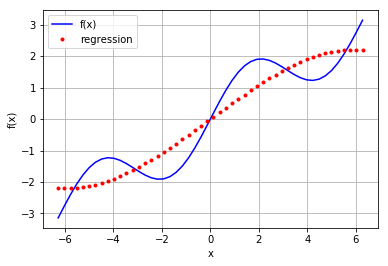

In [16]:
# Regression via least-squares function
plt.plot(x, f(x), 'b', label='f(x)')       # sin() 그래프
plt.plot(x, ry, 'r.', label='regression')  # np.dot() 회귀식 연산결과
plt.legend(loc=0); plt.grid(True); plt.xlabel('x'); plt.ylabel('f(x)')

#### 2) 기저함수에 sin() 함수를 적용
matrix[3, :] = np.sin(x)

In [17]:
matrix[3, :] = np.sin(x)
reg = np.linalg.lstsq(matrix.T, f(x))[0]
ry = np.dot(reg, matrix)

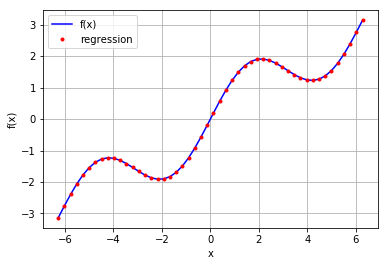

In [18]:
plt.plot(x, f(x), 'b', label='f(x)')
plt.plot(x, ry, 'r.', label='regression')
plt.legend(loc=0)
plt.grid(True); plt.xlabel('x'); plt.ylabel('f(x)')

In [19]:
# 수치적 일치도 높아짐
np.allclose(f(x), ry)

True

In [20]:
np.sum((f(x) - ry) ** 2) / len(x)

7.2578284768244106e-31

In [21]:
reg

array([  9.26243218e-17,   5.00000000e-01,   0.00000000e+00,
         1.00000000e+00])

### 03 잡음이 포함된 경우
Noisy Data

In [23]:
xn = np.linspace(-2 * np.pi, 2 * np.pi, 50)
# 독립변숙와 측정값에 잡음을 포함시킨다 
xn = xn + 0.15 * np.random.standard_normal(len(xn))
yn = f(xn) + 0.25 * np.random.standard_normal(len(xn))

In [24]:
reg = np.polyfit(xn, yn, 7)
ry = np.polyval(reg, xn)

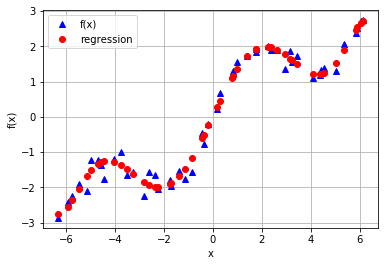

In [26]:
plt.plot(xn, yn, 'b^', label='f(x)')
plt.plot(xn, ry, 'ro', label='regression')
plt.legend(loc=0)
plt.grid(True); plt.xlabel('x'); plt.ylabel('f(x)')

In [ ]:
# 결론
# 회귀법을 통하면 일정한 잡음을 제거할 수 있다

### 04 정렬되지 않은 자료
Regression with unsorted data

In [35]:
# 데이터를 뒤섞으며 생성하기 
# xu = np.random.rand(50) * 4 * np.pi - 2 * np.pi
# yu = f(xu)

In [38]:
# 데이터를 생성 후 뒤섞기 (이해가 더 쉽다)
xu = np.linspace(-2 * np.pi, 2 * np.pi, 50)
np.random.shuffle(xu)
yu = f(xu)

In [39]:
print(xu[:10].round(2))
print(yu[:10].round(2))

[-5.26  6.03 -0.64  2.18  0.9   4.74  1.15  1.67 -0.9  -2.95]
[-1.77  2.76 -0.92  1.91  1.23  1.37  1.49  1.83 -1.23 -1.67]


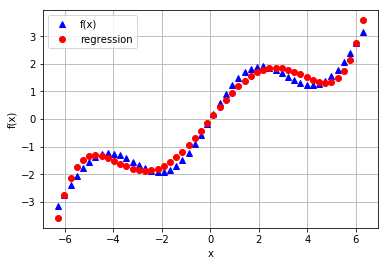

In [42]:
reg = np.polyfit(xu, yu, 5)
ry = np.polyval(reg, xu)

plt.plot(xu, yu, 'b^', label='f(x)')
plt.plot(xu, ry, 'ro', label='regression')
plt.legend(loc=0)
plt.grid(True); plt.xlabel('x'); plt.ylabel('f(x)')

In [ ]:
# 결론
# 잡음이 포함된 데이터와 동일하게, 자료형의 순서는 
# 회귀식 생성에 영향을 받지 않는다

### 05 다차원 자료
Multiple Dimensions

#### 1) np.meshgrid(x, y)
1차원 배열을 정방(square) 행렬로 선언

In [55]:
x = np.linspace(0, 10, 10)
y = np.linspace(0, 10, 10)

# 1차원 배열에서, 2차원 그리드를 생성한다
# 해당 배열을 정방(square) 행렬로 선언
X, Y = np.meshgrid(x, y)

array([[  0.        ,   1.11111111,   2.22222222,   3.33333333,
          4.44444444,   5.55555556,   6.66666667,   7.77777778,
          8.88888889,  10.        ],
       [  0.        ,   1.11111111,   2.22222222,   3.33333333,
          4.44444444,   5.55555556,   6.66666667,   7.77777778,
          8.88888889,  10.        ]])

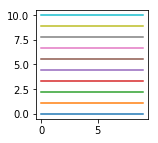

In [72]:
# np.meshgrid() : X 는 수평으로 나열
plt.subplots(1,1,figsize=(2,2))
plt.plot(X); X[:2]

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 1.11111111,  1.11111111,  1.11111111,  1.11111111,  1.11111111,
         1.11111111,  1.11111111,  1.11111111,  1.11111111,  1.11111111],
       [ 2.22222222,  2.22222222,  2.22222222,  2.22222222,  2.22222222,
         2.22222222,  2.22222222,  2.22222222,  2.22222222,  2.22222222]])

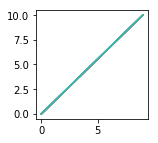

In [74]:
# np.meshgrid() : Y 는 축척
plt.subplots(1,1,figsize=(2,2))
plt.plot(Y); Y[:3]

#### 2) 모델의 적용
Function with two parameters

In [82]:
def fm(x, y):
    return np.sin(x) + 0.25 * x + np.sqrt(y) + 0.05 * y ** 2

In [89]:
x = np.linspace(0, 10, 20)
y = np.linspace(0, 10, 20)

# 1차원 배열에서, 2차원 그리드를 생성한다
# 해당 배열을 정방(square) 행렬로 선언
X, Y = np.meshgrid(x, y)
print('X :', X.shape," Y :", Y.shape )

X : (20, 20)  Y : (20, 20)


In [90]:
# 다차원 함수를 적용
Z = fm(X, Y)

# 2차원 Matrix 를, 1차원 array로 이어 붙인다 (fully connected)
x = X.flatten()
y = Y.flatten()
print('x :', x.shape," y :", y.shape )

x : (400,)  y : (400,)


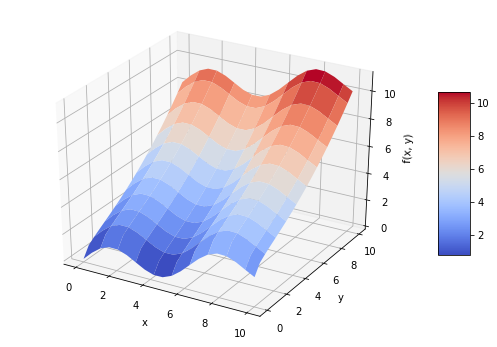

In [92]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl

fig = plt.figure(figsize=(9, 6))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=2, cstride=2, cmap=mpl.cm.coolwarm,
        linewidth=0.5, antialiased=True)
ax.set_xlabel('x'); ax.set_ylabel('y'); ax.set_zlabel('f(x, y)')
fig.colorbar(surf, shrink=0.5, aspect=5)

In [97]:
# 결과의 정제를 위한 기저함수 집합
matrix = np.zeros((len(x), 6 + 1))
matrix[:, 0] = 1           # 0번필드 1로 채운다
matrix[:, 1] = x           # 1번필드 x 배열로 채운다
matrix[:, 2] = y           # 2번필드 y 배열로 채운다
matrix[:, 3] = x ** 2      # 3번필드 x 제곱으로 채운다
matrix[:, 4] = y ** 2      # 4번필드 y 제곱으로 채운다
matrix[:, 5] = np.sin(x)   # 5번필드 x sin() 값으로 채운다 
matrix[:, 6] = np.sqrt(y)  # 6번필드 y 제곱근으로 채운다

print(matrix.shape); matrix[:4]

(400, 7)


array([[ 1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ],
       [ 1.        ,  0.52631579,  0.        ,  0.27700831,  0.        ,
         0.50235115,  0.        ],
       [ 1.        ,  1.05263158,  0.        ,  1.10803324,  0.        ,
         0.86872962,  0.        ],
       [ 1.        ,  1.57894737,  0.        ,  2.49307479,  0.        ,
         0.99996678,  0.        ]])

In [99]:
# 최소 자승 회귀계산
import statsmodels.api as sm
model = sm.OLS(fm(x, y), matrix).fit()
model.rsquared

1.0